# Bagging (short for Bootstrap Aggregating)

It works by creating multiple same models, each trained on different subsets of the training data, and then aggregating their predictions to make a final prediction.

 Bagging is particularly useful for reducing variance and improving the generalization performance of models.

## Understanding the Basics:

**1. Bootstrap Sampling:**

Bagging relies on bootstrap sampling, where multiple random samples (with replacement) are drawn from the original dataset used to train individual models.

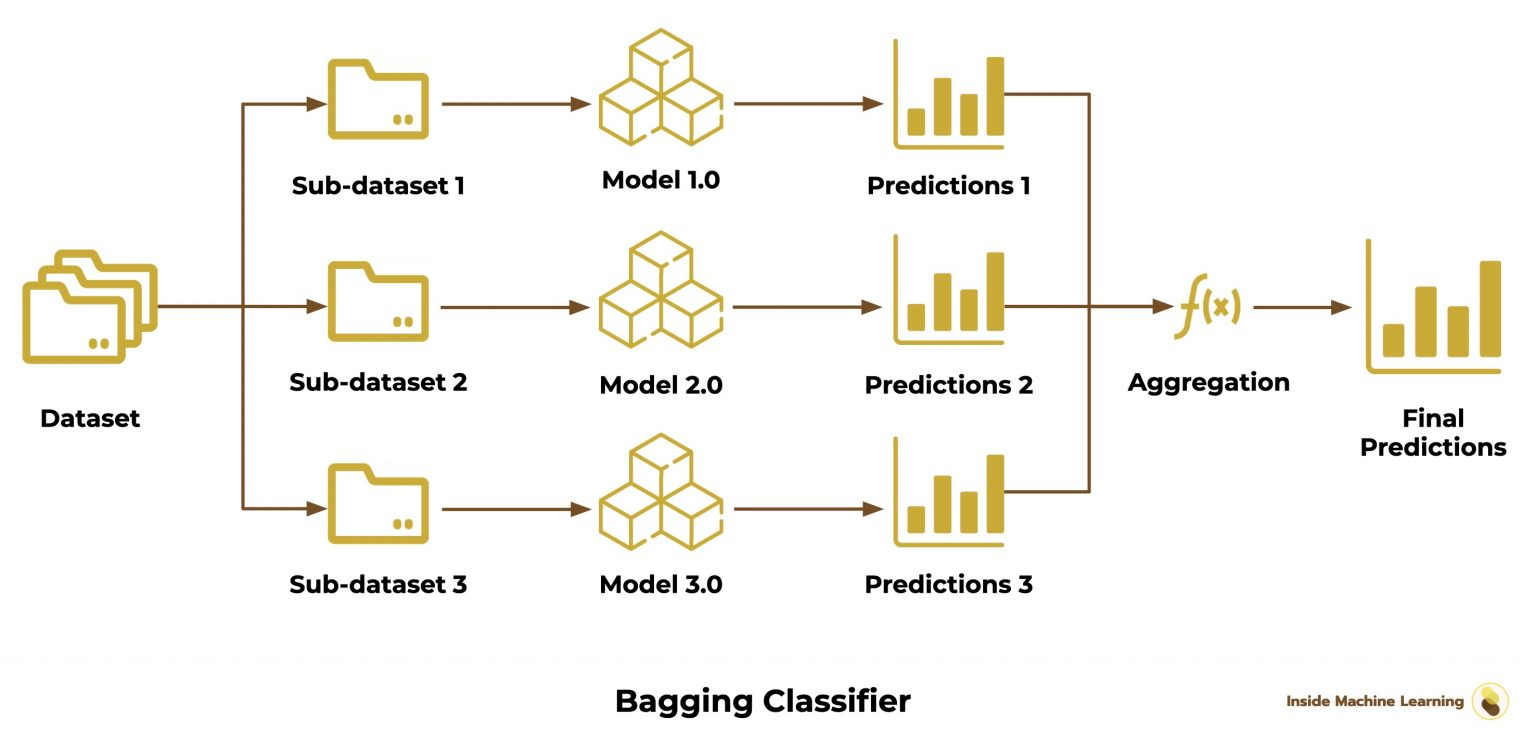

**2. Aggregation:**

Once the models are trained, their predictions are combined or aggregated to make a final prediction. This aggregation can be done through averaging (for regression) or voting (for classification).

## Key Components of Bagging:

**1. Base Learners:**

Bagging uses a base learning algorithm (e.g., decision trees, neural networks) to train multiple models. These models are typically homogeneous and trained independently.

**2. Randomness:**

Randomness is introduced through bootstrap sampling and feature selection. Each model is trained on a randomly selected subset of the data, and at each split (for decision trees), a random subset of features is considered.

**3. Parallelization:**

Bagging is highly parallelizable, as each model can be trained independently of the others. This makes it computationally efficient and scalable for large datasets.



*Let's explore these in detail with real-life dataset.*

### Problem Statement

Predict next-day rain by training classification models on the target variable RainTomorrow.

We can read the data back preprocessed datasets for training, validation, and testing using `pd.read_parquet`, where the following data preparation steps have been performed:

* Splitting a dataset into training, validation & test sets
* Filling/imputing missing values in numeric columns
* Scaling numeric features to a (0,1) range
* Encoding categorical columns as one-hot vectors

In [12]:
import pandas as pd
import numpy as np

In [13]:
train_X = pd.read_parquet("test_inputs.parquet")
train_Y = pd.read_parquet('test_targets.parquet')["RainTomorrow"]

In [14]:
print('train_inputs:', train_X.shape)
print('train_targets:', train_Y.shape)


train_inputs: (2591, 123)
train_targets: (2591,)


In [15]:
numeric_cols = train_X.select_dtypes(include=np.number).columns.tolist()

In [16]:
X = train_X[numeric_cols]

In [17]:
from sklearn.model_selection import train_test_split

In [24]:
train_inputs, test_inputs ,train_target ,test_target = train_test_split(X, train_Y, test_size=0.4, random_state=42)


In [25]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_target.shape)

print('test_inputs:', test_inputs.shape)
print('test_targets:', test_target.shape)

train_inputs: (1554, 118)
train_targets: (1554,)
test_inputs: (1037, 118)
test_targets: (1037,)


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

In [26]:
svc = SVC(C = 0.01, kernel= "sigmoid", random_state=42)
svc.fit(train_inputs,train_target)
y_pred = svc.predict(test_inputs)

print("SVC accuracy",accuracy_score(test_target,y_pred))


SVC accuracy 0.7521697203471552


Very worst score on this dataset far now. Let's try:

## Bagging Classifier

In [30]:
bagging = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [31]:
bagging.fit(train_inputs,train_target)
y_pred = bagging.predict(test_inputs)
print("Bagging using SVC",accuracy_score(test_target,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging using SVC 0.793635486981678


With default setting the accuracy has improved. Let's try:

## Pasting


It involves drawing random samples without replacement from the original dataset.

### Advantages and Applications:

* Pasting can be beneficial when dealing with large datasets, as it avoids redundant samples in the subsets.
* It can lead to improved diversity among base learners, as each subset contains unique instances of the data.




In [34]:
pasting = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=False,
    random_state=42,
    verbose = 1,
    n_jobs=-1
)

In [35]:
pasting.fit(train_inputs,train_target)
y_pred = pasting.predict(test_inputs)
print("Pasting using SVC",accuracy_score(test_target,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   20.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Pasting using SVC 0.7849566055930569


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   28.9s finished


With default setting the accuracy has improved than only one estimator but is slightly less than bagging. Let's try:

## Random Subspaces:

It introduces randomness by sampling a subset of features (columns) from the original dataset for each base learner.

## Advantages and Applications:

* Random Subspaces can help reduce the correlation between base learners, as each model focuses on different subsets of features.
* It is commonly used in feature selection and dimensionality reduction tasks, when dealing with high-dimensional datasets, as it reduces the computational complexity of model training by considering only a subset of features.

In [43]:
rsub = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42,
    verbose = 1,
    n_jobs=-1
)

In [44]:
rsub.fit(train_inputs,train_target)
y_pred = rsub.predict(test_inputs)
print("Random Subspaces using SVC",accuracy_score(test_target,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   53.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Random Subspaces using SVC 0.7608486017357763


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   44.4s finished


With default setting the accuracy has improved than only one estimator but is  less than bagging and pasting. Let's try:

## Random Patches:

It is a combination of Pasting and Random Subspaces, where both random sampling of data instances and features are applied simultaneously. Each base learner is trained on a randomly selected subset of data instances and features, leading to greater diversity among the models.

## Advantages and Applications:

* Random Patches offers the benefits of both Pasting and Random Subspaces, providing enhanced diversity among base learners.
* It is suitable for scenarios where both sample and feature diversity are crucial for model performance.
* Random Patches can be particularly effective in high-dimensional datasets with a large number of features, as it helps mitigate the curse of dimensionality and reduces overfitting.

In [48]:
 rpatch = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)


In [49]:
rpatch.fit(train_inputs,train_target)
y_pred = rpatch.predict(test_inputs)
print("Random Patches using SVC",accuracy_score(test_target,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Patches using SVC 0.7560270009643202


Nothing better than our simple model.

## What is the OOB Score?

Statistically, the probability of being sampled during bootstrap (a subsample of size m from the main sample of the same size "with replacement") for sufficiently large samples is approximately 0.632, i.e. approximately 36.8% of objects are “overboard”.

### Out-of-Bag Samples:

The data points that are not included in the bootstrap sample for training a particular model are called "out-of-bag" (OOB) samples for that model.

By leveraging these out-of-bag samples, provides an efficient and unbiased estimate of the model's generalization performance without the need for additional validation data.

In [50]:
oob = BaggingClassifier(
    base_estimator= SVC(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

In [51]:
oob.fit(train_inputs,train_target)
oob.oob_score_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8011583011583011

Model is working great at unseen data. Nice!

### Bagging Tips (Based upon above)

* Bagging generally gives better results than Pasting.
* Good results come around the 25% to 50% row sampling mark (as I have tried both but good results were on 0.5)
* Random Patches and Subspaces should be used while dealing with high dimensional data for feature selections.
* To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

Let's perform this!

## Applying GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters = {
    'n_estimators': [50,100],
    'max_samples': [0.1,0.4,0.7],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7],
    'bootstrap_features': [True, False]
    }

In [60]:
search = GridSearchCV(BaggingClassifier(random_state = 42, n_jobs=-1), parameters, n_jobs=-1, cv=3)

In [61]:
%%time

search.fit(train_inputs,train_target)
print("Best Parameters", search.best_params_)
print("Best Score", search.best_score_)


Best Parameters {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.7, 'max_samples': 0.1, 'n_estimators': 50}
Best Score 0.826898326898327
CPU times: user 1.31 s, sys: 175 ms, total: 1.48 s
Wall time: 1min 13s


Better accuracy.

Now let's move to,

## Bagging Regressors

Bagging Regressor is based on the Bagging (Bootstrap Aggregating) technique, which aims to improve the performance of a single base regressor by training multiple regressors on different subsets of the training data and then averaging their predictions.

### How Bagging Regressor Works?

1. **Bootstrap Sampling:**

Bagging Regressor generates multiple random samples (with replacement) from the original training dataset. Each sample is used to train a separate base regressor.

2. **Base Regressors:**

Bagging Regressor typically uses a single type of base regressor (e.g., Decision Tree Regressor), which is trained independently on each bootstrap sample.

3. **Aggregation:**

Once the base regressors are trained, Bagging Regressor aggregates their predictions to make a final prediction. For regression tasks, this aggregation is typically done by averaging the predictions of all base regressors.


### Key Features of Bagging Regressor:

* **Variance Reduction:**

Bagging Regressor helps reduce the variance of the model by training multiple regressors on different subsets of data. This leads to a more robust and stable prediction.

* **Bias-Variance Tradeoff:**

Bagging Regressor strikes a balance between bias and variance, as it reduces variance without significantly increasing bias. This results in improved generalization performance on unseen data.

* **Parallelization:**

Bagging Regressor can be parallelized, as each base regressor can be trained independently. This makes it computationally efficient and scalable for large datasets.

*Let's implement this practically.*

### Problem Statement

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States 2010. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

### Importing and Feature Engineering Data

*Note: Refer to [this](https://github.com/nikitaprasad21/ML-Cheat-Codes/blob/main/Linear-Regression/acme_expediture.ipynb) for Complete EDA.*

In [62]:
acme_data = pd.read_csv("acme_dataset.csv")

In [63]:
train_inputs,test_inputs,train_target,test_target = train_test_split(acme_data.drop(columns=["charges"]), acme_data["charges"], test_size=0.2, random_state=42)

### Transformer Implementation

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [65]:
trf1 = ColumnTransformer(transformers=[
    # One Hot Encoding

    ("ohe_sex", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[1]),
    ("ohe_smoker", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[4]),
    ("ohe_region", OneHotEncoder(sparse_output= False, handle_unknown="ignore", drop= "first"),[5]),
    # *Handle unknown categories with OneHotEncoder by encoding them as zeros*

],remainder="passthrough")

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,8)) # Use column count
])

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

In [80]:
svm = SVR(kernel="linear", C=100, gamma="auto")

### Creating Ensemble Pipeline

**Pipeline Vs make_pipeline**

Pipeline requires naming of steps, make_pipeline does not.

(Same applies to ColumnTransformer vs make_column_transformer)

In [81]:
# Create a pipeline with preprocessing and the Bagging Regressor
pipe = Pipeline([
    ("trf1", trf1),
    ("trf2", trf2),
    ("svm", svm)
])

In [82]:
# Fit the pipeline to the training data
pipe.fit(train_inputs, train_target)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [4]),
                                                 ('ohe_region',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('svm', SVR(C=100, gamma='auto', kernel='linear'))])

### Calculating the loss after training

In [78]:
from sklearn.metrics import r2_score

In [83]:
# Evaluate the model on the test data
test_pred = pipe.predict(test_inputs)
print("r2score:", r2_score(test_target, test_pred))

r2score: 0.6507722021251061


Very bad result.

Let's use **GridSearchCV** to get parameters and score.

In [86]:
bagreg=BaggingRegressor(random_state=42, n_jobs=-1)

In [87]:
pipeline = Pipeline([
    ("trf1", trf1),
    ("trf2", trf2),
    ("bagreg", bagreg)
])

In [88]:
%%time

params = {
          'bagreg__n_estimators': [20,50,100],
          'bagreg__max_samples': [0.5,1.0],
          'bagreg__max_features': [0.5,1.0],
          'bagreg__bootstrap': [True, False],
          'bagreg__bootstrap_features': [True, False]
          }


CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 13.1 µs


In [89]:
%%time

bagging_regressor_grid = GridSearchCV(pipeline, param_grid =params, cv=3, n_jobs=-1)
bagging_regressor_grid.fit(train_inputs,train_target)

CPU times: user 911 ms, sys: 139 ms, total: 1.05 s
Wall time: 26.6 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1]),
                                                                        ('ohe_smoker',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [4]),
                                                                        ('ohe_region',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [5])])),
                                       ('trf2',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         slice(0, 8, None))])),
                                       ('bagreg',
                                        BaggingRegressor(n_jobs=-1,
                                                         random_state=42))]),
             n_jobs=-1,
             param_grid={'bagreg__bootstrap': [True, False],
                         'bagreg__bootstrap_features': [True, False],
                         'bagreg__max_features': [0.5, 1.0],
                         'bagreg__max_samples': [0.5, 1.0],
                         'bagreg__n_estimators': [20, 50, 100]})

In [90]:
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Best R^2 Score Through Grid Search : 0.835
Best Parameters :  {'bagreg__bootstrap': True, 'bagreg__bootstrap_features': False, 'bagreg__max_features': 1.0, 'bagreg__max_samples': 0.5, 'bagreg__n_estimators': 100}


Certainly, bagging helped in improving the results of this model.

*Note: You can also use OOB Samples to test your model.*

## Difference between Bagging and Voting

In summary, while both bagging and voting ensemble methods involve combining predictions from multiple base models, **bagging** focuses on training homogeneous base models using *bootstrap samples and aggregating predictions* through averaging or voting, while **voting** ensemble methods combine predictions from potentially heterogeneous base models through a *voting* mechanism.


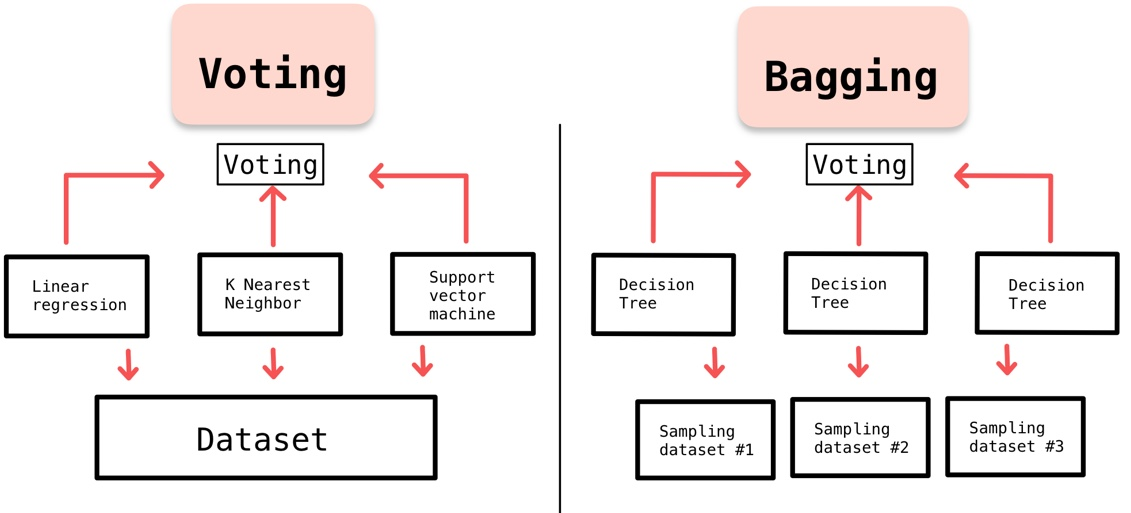

> Stay tuned for other Ensemble Techniques Repo and Don't forget to **Star** this Github Repository for more such contents and consider **sharing with others**.